In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import holidays
from meteostat import Stations, Hourly
from datetime import datetime

In [2]:
df_2019 = pd.read_csv("C:/Users/ivan_/OneDrive/Desktop/Air Quality Bologna/Bologna air quality 2019.csv", sep = ';')
df_2020 = pd.read_csv("C:/Users/ivan_/OneDrive/Desktop/Air Quality Bologna/Bologna air quality 2020.csv", sep = ';')
df_2021 = pd.read_csv("C:/Users/ivan_/OneDrive/Desktop/Air Quality Bologna/Bologna air quality 2021.csv", sep = ';')
df_2022 = pd.read_csv("C:/Users/ivan_/OneDrive/Desktop/Air Quality Bologna/Bologna air quality 2022.csv", sep = ';')
df_2023 = pd.read_csv("C:/Users/ivan_/OneDrive/Desktop/Air Quality Bologna/Bologna air quality 2023.csv", sep = ';')
df_2024 = pd.read_csv("C:/Users/ivan_/OneDrive/Desktop/Air Quality Bologna/Bologna air quality 2024.csv", sep = ';')

In [3]:
air_quality = pd.concat([df_2019, df_2020, df_2021, df_2022, df_2023, df_2024], ignore_index=True)

In [4]:
air_quality

,COD_STAZ,AGENTE,DATA_INIZIO,DATA_FINE,VALORE,UM
0,PORTA SAN FELICE,NO2 (BIOSSIDO DI AZOTO),2019-09-12T16:01:00+02:00,2019-09-12T17:00:00+02:00,59.0,ug/m3
1,PORTA SAN FELICE,NO2 (BIOSSIDO DI AZOTO),2019-10-11T15:01:00+02:00,2019-10-11T16:00:00+02:00,59.0,ug/m3
2,PORTA SAN FELICE,NO2 (BIOSSIDO DI AZOTO),2019-10-22T16:01:00+02:00,2019-10-22T17:00:00+02:00,59.0,ug/m3
3,PORTA SAN FELICE,NO2 (BIOSSIDO DI AZOTO),2019-11-10T16:01:00+01:00,2019-11-10T17:00:00+01:00,59.0,ug/m3
4,PORTA SAN FELICE,NO2 (BIOSSIDO DI AZOTO),2019-11-14T15:01:00+01:00,2019-11-14T16:00:00+01:00,59.0,ug/m3
...,...,...,...,...,...,...
472614,VIA CHIARINI,O3 (OZONO),2024-12-30T20:01:00+01:00,2024-12-30T21:00:00+01:00,2.0,ug/m3
472615,VIA CHIARINI,NO2 (BIOSSIDO DI AZOTO),2024-12-25T04:01:00+01:00,2024-12-25T05:00:00+01:00,25.0,ug/m3
472616,VIA CHIARINI,NO2 (BIOSSIDO DI AZOTO),2024-12-25T15:01:00+01:00,2024-12-25T16:00:00+01:00,11.0,ug/m3
472617,VIA CHIARINI,NO2 (BIOSSIDO DI AZOTO),2024-12-29T04:01:00+01:00,2024-12-29T05:00:00+01:00,10.0,ug/m3


In [5]:
air_quality.rename(columns={
    "COD_STAZ": "station_code",
    "AGENTE": "pollutant",
    "DATA_INIZIO": "start_datetime",
    "DATA_FINE": "end_datetime",
    "VALORE": "value",
    "UM": "unit"
}, inplace=True)

In [6]:
air_quality['pollutant'] = air_quality['pollutant'].replace({
    'CO (MONOSSIDO DI CARBONIO)': 'CO',
    'NO2 (BIOSSIDO DI AZOTO)': 'NO2',
    'NOX (OSSIDI DI AZOTO)': 'NOX',
    'NO (MONOSSIDO DI AZOTO)': 'NO',
    'O3 (OZONO)': 'O3',
    'C6H6 (BENZENE)': 'BENZENE'
})

In [7]:
air_quality = air_quality.sort_values(by='start_datetime')

In [8]:
air_quality['start_datetime'] = pd.to_datetime(air_quality['start_datetime'], utc=True)
air_quality['end_datetime'] = pd.to_datetime(air_quality['end_datetime'], utc=True)

In [9]:
air_quality.info()

<class 'pandas.core.frame.DataFrame'>
Index: 472619 entries, 20568 to 428316
Data columns (total 6 columns):
 #   Column          Non-Null Count   Dtype              
---  ------          --------------   -----              
 0   station_code    472619 non-null  object             
 1   pollutant       472619 non-null  object             
 2   start_datetime  472619 non-null  datetime64[ns, UTC]
 3   end_datetime    472619 non-null  datetime64[ns, UTC]
 4   value           472607 non-null  float64            
 5   unit            472619 non-null  object             
dtypes: datetime64[ns, UTC](2), float64(1), object(3)
memory usage: 25.2+ MB


In [10]:
air_quality['station_code'] = air_quality['station_code'].str.strip()
air_quality['pollutant'] = air_quality['pollutant'].str.strip()
air_quality['unit'] = air_quality['unit'].str.strip()

In [11]:
air_quality.isnull().sum()

station_code       0
pollutant          0
start_datetime     0
end_datetime       0
value             12
unit               0
dtype: int64

In [12]:
air_quality = air_quality.dropna(subset=['value']).reset_index(drop=True)

In [13]:
air_quality.isnull().sum()

station_code      0
pollutant         0
start_datetime    0
end_datetime      0
value             0
unit              0
dtype: int64

In [14]:
air_quality.duplicated().sum()

np.int64(0)

In [15]:
print(air_quality.columns)

Index(['station_code', 'pollutant', 'start_datetime', 'end_datetime', 'value',
       'unit'],
      dtype='object')


In [ ]:
# Pivot table: index is START_DATETIME, columns are pollutants, values are pollutant measurements
air_wide = air_quality.pivot_table(
    index='start_datetime',
    columns='pollutant',
    values='value',
    aggfunc='mean' 
)

air_wide.columns.name = None
air_wide = air_wide.reset_index()

In [17]:
air_wide

,start_datetime,BENZENE,CO,NO,NO2,NOX,O3,PM10,PM2.5
0,2018-12-31 23:01:00+00:00,NaN,1.7,97.0,29.666667,189.0,1.0,51.333333,39.0
1,2019-01-01 00:01:00+00:00,NaN,1.7,95.0,27.000000,182.0,3.5,NaN,NaN
2,2019-01-01 01:01:00+00:00,4.6,1.7,95.0,24.666667,180.0,2.0,NaN,NaN
3,2019-01-01 02:01:00+00:00,4.7,1.8,NaN,22.500000,NaN,1.5,NaN,NaN
4,2019-01-01 03:01:00+00:00,4.6,1.8,101.0,32.500000,194.0,2.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...
52596,2024-12-31 18:01:00+00:00,2.3,1.0,64.0,33.333333,134.0,10.0,NaN,NaN
52597,2024-12-31 19:01:00+00:00,2.1,0.8,51.0,31.333333,112.0,8.0,NaN,NaN
52598,2024-12-31 20:01:00+00:00,1.7,0.7,32.0,26.000000,77.0,20.0,NaN,NaN
52599,2024-12-31 21:01:00+00:00,1.1,0.5,13.0,22.333333,37.0,18.0,NaN,NaN


In [18]:
air_wide.isnull().sum()

start_datetime        0
BENZENE            3670
CO                  814
NO                 1049
NO2                   8
NOX                 933
O3                   20
PM10              50409
PM2.5             50412
dtype: int64

In [19]:
air_wide = air_wide.set_index('start_datetime').interpolate(method='time').reset_index()

In [20]:
air_wide = air_wide.fillna(method='ffill')

In [21]:
air_wide.isnull().sum()

start_datetime    0
BENZENE           2
CO                0
NO                0
NO2               0
NOX               0
O3                0
PM10              0
PM2.5             0
dtype: int64

In [22]:
air_wide = air_wide.fillna(method='bfill')

In [23]:
air_wide.isnull().sum()

start_datetime    0
BENZENE           0
CO                0
NO                0
NO2               0
NOX               0
O3                0
PM10              0
PM2.5             0
dtype: int64

In [24]:
air_wide = air_wide.set_index('start_datetime')

In [25]:
print(air_wide.describe())

            BENZENE            CO            NO           NO2           NOX  \
count  52601.000000  52601.000000  52601.000000  52601.000000  52601.000000   
mean       0.955599      0.577847     18.556377     24.867462     67.987833   
std        0.726675      0.309612     23.227358     13.403766     48.896042   
min        0.000000      0.000000     -0.500000      0.666667      0.000000   
25%        0.500000      0.300000      5.000000     14.333333     35.000000   
50%        0.800000      0.500000     11.000000     22.333333     56.000000   
75%        1.300000      0.700000     23.000000     33.333333     87.000000   
max       16.200000      6.800000    325.000000     94.000000    598.000000   

                 O3          PM10         PM2.5  
count  52601.000000  52601.000000  52601.000000  
mean      46.629166     23.223537     14.830500  
std       37.478693     13.702741     11.218892  
min       -0.500000      0.333333      0.000000  
25%       13.500000     14.000000     

In [ ]:
pollutants = ['BENZENE', 'CO', 'NO', 'NO2', 'NOX', 'O3', 'PM10', 'PM2.5']

for pollutant in pollutants:
    neg_count = (air_wide[pollutant] < 0).sum()
    print(f"{pollutant} has {neg_count} negative values")


for pollutant in pollutants:
    air_wide.loc[air_wide[pollutant] < 0, pollutant] = np.nan


print(air_wide.isna().sum())

BENZENE has 0 negative values
CO has 0 negative values
NO has 2 negative values
NO2 has 0 negative values
NOX has 0 negative values
O3 has 1 negative values
PM10 has 0 negative values
PM2.5 has 0 negative values
BENZENE    0
CO         0
NO         2
NO2        0
NOX        0
O3         1
PM10       0
PM2.5      0
dtype: int64


In [ ]:
air_wide.loc[air_wide['NO'] < 0, 'NO'] = np.nan
air_wide.loc[air_wide['O3'] < 0, 'O3'] = np.nan


print(air_wide[['NO', 'O3']].isna().sum())


air_wide['NO'] = air_wide['NO'].interpolate(method='time')
air_wide['O3'] = air_wide['O3'].interpolate(method='time')

print(air_wide[['NO', 'O3']].isna().sum())

NO    2
O3    1
dtype: int64
NO    0
O3    0
dtype: int64


In [28]:
air_wide['year'] = air_wide.index.year
air_wide['month'] = air_wide.index.month
air_wide['day'] = air_wide.index.day
air_wide['weekday'] = air_wide.index.dayofweek
air_wide['is_weekend'] = air_wide['weekday'].isin([5, 6]).astype(int)

In [29]:
def get_season(month):
    if month in [12, 1, 2]:
        return 'Winter'
    elif month in [3, 4, 5]:
        return 'Spring'
    elif month in [6, 7, 8]:
        return 'Summer'
    else:
        return 'Fall'
air_wide['season'] = air_wide['month'].apply(get_season)

In [30]:
air_wide = air_wide.iloc[1:]

In [31]:
italian_holidays = holidays.country_holidays('IT', years=range(2021, 2024))
air_wide['is_holiday'] = pd.Series(air_wide.index.date).isin(italian_holidays).astype(int).values

In [32]:
air_wide.index = pd.to_datetime(air_wide.index).tz_convert('UTC')

In [ ]:
bologna_lat, bologna_lon = 44.4949, 11.3426

# Find nearest station
stations = Stations().nearby(bologna_lat, bologna_lon)
station = stations.fetch(1)

if station.empty:
    raise ValueError("No weather station found near Bologna")

station_id = station.index[0]
print(f"Station ID: {station_id}")

Station ID: 16140


In [ ]:
start = datetime(2019, 1, 1)
end = datetime(2024, 12, 31, 23)

weather_data = Hourly(16140, start, end)
weather_df = weather_data.fetch()


weather_df = weather_df[['temp', 'prcp', 'wspd', 'rhum']]
weather_df = weather_df.rename(columns={
    'temp': 'temperature',
    'prcp': 'precipitation',
    'wspd': 'wind_speed',
    'rhum': 'humidity'
})

weather_df.index = pd.to_datetime(weather_df.index).tz_localize('UTC')

In [ ]:
air_wide.index = air_wide.index.floor('H')

air_wide = air_wide.join(weather_df, how='left', rsuffix='_weather')

In [36]:
air_wide

,BENZENE,CO,NO,NO2,NOX,O3,PM10,PM2.5,year,month,day,weekday,is_weekend,season,is_holiday,temperature,precipitation,wind_speed,humidity
start_datetime,,,,,,,,,,,,,,,,,,,
2019-01-01 00:00:00+00:00,4.6,1.7,95.0,27.000000,182.0,3.5,50.152778,37.916667,2019,1,1,1,0,Winter,0,-1.0,<NA>,3.6,98.0
2019-01-01 01:00:00+00:00,4.6,1.7,95.0,24.666667,180.0,2.0,48.972222,36.833333,2019,1,1,1,0,Winter,0,-1.0,<NA>,1.8,100.0
2019-01-01 02:00:00+00:00,4.7,1.8,98.0,22.500000,187.0,1.5,47.791667,35.750000,2019,1,1,1,0,Winter,0,-2.0,<NA>,3.6,100.0
2019-01-01 03:00:00+00:00,4.6,1.8,101.0,32.500000,194.0,2.0,46.611111,34.666667,2019,1,1,1,0,Winter,0,-2.2,<NA>,0.0,97.0
2019-01-01 04:00:00+00:00,4.5,1.7,101.0,29.000000,194.0,1.0,45.430556,33.583333,2019,1,1,1,0,Winter,0,-3.0,<NA>,1.8,100.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-12-31 18:00:00+00:00,2.3,1.0,64.0,33.333333,134.0,10.0,22.333333,19.000000,2024,12,31,1,0,Winter,0,5.1,0.0,3.6,81.0
2024-12-31 19:00:00+00:00,2.1,0.8,51.0,31.333333,112.0,8.0,22.333333,19.000000,2024,12,31,1,0,Winter,0,4.0,0.0,9.4,87.0
2024-12-31 20:00:00+00:00,1.7,0.7,32.0,26.000000,77.0,20.0,22.333333,19.000000,2024,12,31,1,0,Winter,0,5.0,0.0,9.4,81.0


In [37]:
air_wide.isnull().sum()

BENZENE              0
CO                   0
NO                   0
NO2                  0
NOX                  0
O3                   0
PM10                 0
PM2.5                0
year                 0
month                0
day                  0
weekday              0
is_weekend           0
season               0
is_holiday           0
temperature          0
precipitation    30058
wind_speed           0
humidity             0
dtype: int64

In [38]:
air_wide['precipitation'] = air_wide['precipitation'].fillna(0)

In [39]:
season_mapping = {
    'Winter': 0,
    'Spring': 1,
    'Summer': 2,
    'Fall': 3
}

# Apply the mapping to the season column
air_wide['season'] = air_wide['season'].map(season_mapping)

In [40]:
air_wide['CO_ugm3'] = air_wide['CO'] * 1000

In [41]:
air_wide = air_wide.drop(columns=['CO'])

In [42]:
def get_subindex(conc, breakpoints):
    for bp in breakpoints:
        if bp['low'] <= conc <= bp['high']:
            return ((bp['aqi_high'] - bp['aqi_low']) / (bp['high'] - bp['low'])) * (conc - bp['low']) + bp['aqi_low']
    return None

In [43]:
# PM2.5 AQI Subindex
def pm25_aqi(pm25):
    breakpoints = [
        {"low": 0.0, "high": 12.0, "aqi_low": 0, "aqi_high": 50},
        {"low": 12.1, "high": 35.4, "aqi_low": 51, "aqi_high": 100},
        {"low": 35.5, "high": 55.4, "aqi_low": 101, "aqi_high": 150},
        {"low": 55.5, "high": 150.4, "aqi_low": 151, "aqi_high": 200},
        {"low": 150.5, "high": 250.4, "aqi_low": 201, "aqi_high": 300},
        {"low": 250.5, "high": 350.4, "aqi_low": 301, "aqi_high": 400},
        {"low": 350.5, "high": 500.4, "aqi_low": 401, "aqi_high": 500},
    ]
    return get_subindex(pm25, breakpoints)

In [44]:
# PM10 AQI Subindex
def pm10_aqi(pm10):
    breakpoints = [
        {"low": 0, "high": 54, "aqi_low": 0, "aqi_high": 50},
        {"low": 55, "high": 154, "aqi_low": 51, "aqi_high": 100},
        {"low": 155, "high": 254, "aqi_low": 101, "aqi_high": 150},
        {"low": 255, "high": 354, "aqi_low": 151, "aqi_high": 200},
        {"low": 355, "high": 424, "aqi_low": 201, "aqi_high": 300},
        {"low": 425, "high": 504, "aqi_low": 301, "aqi_high": 400},
        {"low": 505, "high": 604, "aqi_low": 401, "aqi_high": 500},
    ]
    return get_subindex(pm10, breakpoints)

In [45]:
# NO2 AQI Subindex (1-hour avg)
def no2_aqi(no2):
    breakpoints = [
        {"low": 0, "high": 53, "aqi_low": 0, "aqi_high": 50},
        {"low": 54, "high": 100, "aqi_low": 51, "aqi_high": 100},
        {"low": 101, "high": 360, "aqi_low": 101, "aqi_high": 150},
        {"low": 361, "high": 649, "aqi_low": 151, "aqi_high": 200},
        {"low": 650, "high": 1249, "aqi_low": 201, "aqi_high": 300},
        {"low": 1250, "high": 1649, "aqi_low": 301, "aqi_high": 400},
        {"low": 1650, "high": 2049, "aqi_low": 401, "aqi_high": 500},
    ]
    return get_subindex(no2, breakpoints)

In [46]:
# O3 AQI Subindex (8-hour avg)
def o3_aqi(o3):
    breakpoints = [
        {"low": 0.0, "high": 54.0, "aqi_low": 0, "aqi_high": 50},
        {"low": 55.0, "high": 70.0, "aqi_low": 51, "aqi_high": 100},
        {"low": 71.0, "high": 85.0, "aqi_low": 101, "aqi_high": 150},
        {"low": 86.0, "high": 105.0, "aqi_low": 151, "aqi_high": 200},
        {"low": 106.0, "high": 200.0, "aqi_low": 201, "aqi_high": 300},
    ]
    return get_subindex(o3, breakpoints)

In [47]:
# CO AQI Subindex (µg/m3, 1 ppm ≈ 1145 µg/m³)
def co_aqi(co_ugm3):
    co_ppm = co_ugm3 / 1145
    breakpoints = [
        {"low": 0.0, "high": 4.4, "aqi_low": 0, "aqi_high": 50},
        {"low": 4.5, "high": 9.4, "aqi_low": 51, "aqi_high": 100},
        {"low": 9.5, "high": 12.4, "aqi_low": 101, "aqi_high": 150},
        {"low": 12.5, "high": 15.4, "aqi_low": 151, "aqi_high": 200},
        {"low": 15.5, "high": 30.4, "aqi_low": 201, "aqi_high": 300},
        {"low": 30.5, "high": 40.4, "aqi_low": 301, "aqi_high": 400},
        {"low": 40.5, "high": 50.4, "aqi_low": 401, "aqi_high": 500},
    ]
    return get_subindex(co_ppm, breakpoints)

In [48]:
def calculate_aqi(row):
    subindices = {
        "PM2.5": pm25_aqi(row['PM2.5']),
        "PM10": pm10_aqi(row['PM10']),
        "NO2": no2_aqi(row['NO2']),
        "O3": o3_aqi(row['O3']),
        "CO": co_aqi(row['CO_ugm3']),
    }
    # Remove None values before max()
    valid_values = [v for v in subindices.values() if v is not None]
    if not valid_values:
        return None  # or np.nan if preferred
    aqi = max(valid_values)
    return round(aqi)


def aqi_category(aqi):
    if aqi is None:
        return "Unknown"
    elif aqi <= 50:
        return "Good"
    elif aqi <= 100:
        return "Moderate"
    elif aqi <= 150:
        return "Unhealthy for Sensitive Groups"
    elif aqi <= 200:
        return "Unhealthy"
    elif aqi <= 300:
        return "Very Unhealthy"
    else:
        return "Hazardous"

In [49]:
air_wide['AQI'] = air_wide.apply(calculate_aqi, axis=1)
air_wide['AQI_category'] = air_wide['AQI'].apply(aqi_category)

In [50]:
air_wide

,BENZENE,NO,NO2,NOX,O3,PM10,PM2.5,year,month,day,...,is_weekend,season,is_holiday,temperature,precipitation,wind_speed,humidity,CO_ugm3,AQI,AQI_category
start_datetime,,,,,,,,,,,,,,,,,,,,,
2019-01-01 00:00:00+00:00,4.6,95.0,27.000000,182.0,3.5,50.152778,37.916667,2019,1,1,...,0,0,0,-1.0,0.0,3.6,98.0,1700.0,107,Unhealthy for Sensitive Groups
2019-01-01 01:00:00+00:00,4.6,95.0,24.666667,180.0,2.0,48.972222,36.833333,2019,1,1,...,0,0,0,-1.0,0.0,1.8,100.0,1700.0,104,Unhealthy for Sensitive Groups
2019-01-01 02:00:00+00:00,4.7,98.0,22.500000,187.0,1.5,47.791667,35.750000,2019,1,1,...,0,0,0,-2.0,0.0,3.6,100.0,1800.0,102,Unhealthy for Sensitive Groups
2019-01-01 03:00:00+00:00,4.6,101.0,32.500000,194.0,2.0,46.611111,34.666667,2019,1,1,...,0,0,0,-2.2,0.0,0.0,97.0,1800.0,98,Moderate
2019-01-01 04:00:00+00:00,4.5,101.0,29.000000,194.0,1.0,45.430556,33.583333,2019,1,1,...,0,0,0,-3.0,0.0,1.8,100.0,1700.0,96,Moderate
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-12-31 18:00:00+00:00,2.3,64.0,33.333333,134.0,10.0,22.333333,19.000000,2024,12,31,...,0,0,0,5.1,0.0,3.6,81.0,1000.0,66,Moderate
2024-12-31 19:00:00+00:00,2.1,51.0,31.333333,112.0,8.0,22.333333,19.000000,2024,12,31,...,0,0,0,4.0,0.0,9.4,87.0,800.0,66,Moderate
2024-12-31 20:00:00+00:00,1.7,32.0,26.000000,77.0,20.0,22.333333,19.000000,2024,12,31,...,0,0,0,5.0,0.0,9.4,81.0,700.0,66,Moderate


In [51]:
air_wide.isnull().sum()

BENZENE          0
NO               0
NO2              0
NOX              0
O3               0
PM10             0
PM2.5            0
year             0
month            0
day              0
weekday          0
is_weekend       0
season           0
is_holiday       0
temperature      0
precipitation    0
wind_speed       0
humidity         0
CO_ugm3          0
AQI              0
AQI_category     0
dtype: int64

In [52]:
air_wide.dtypes

BENZENE          float64
NO               float64
NO2              float64
NOX              float64
O3               float64
PM10             float64
PM2.5            float64
year               int32
month              int32
day                int32
weekday            int32
is_weekend         int64
season             int64
is_holiday         int64
temperature      Float64
precipitation    Float64
wind_speed       Float64
humidity         Float64
CO_ugm3          float64
AQI                int64
AQI_category      object
dtype: object

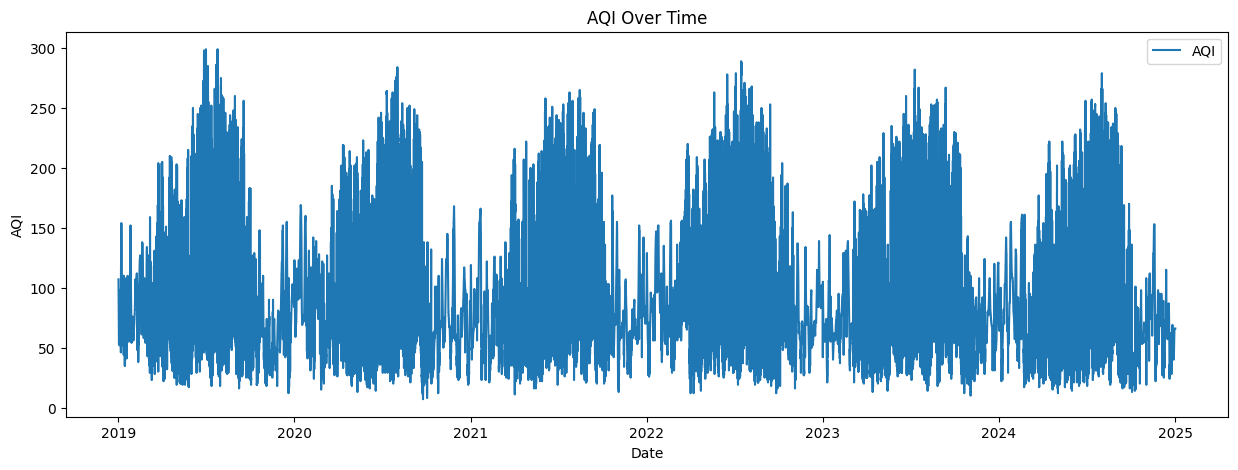

In [53]:
plt.figure(figsize=(15,5))
plt.plot(air_wide.index, air_wide['AQI'], label='AQI')
plt.title('AQI Over Time')
plt.xlabel('Date')
plt.ylabel('AQI')
plt.legend()
plt.show()

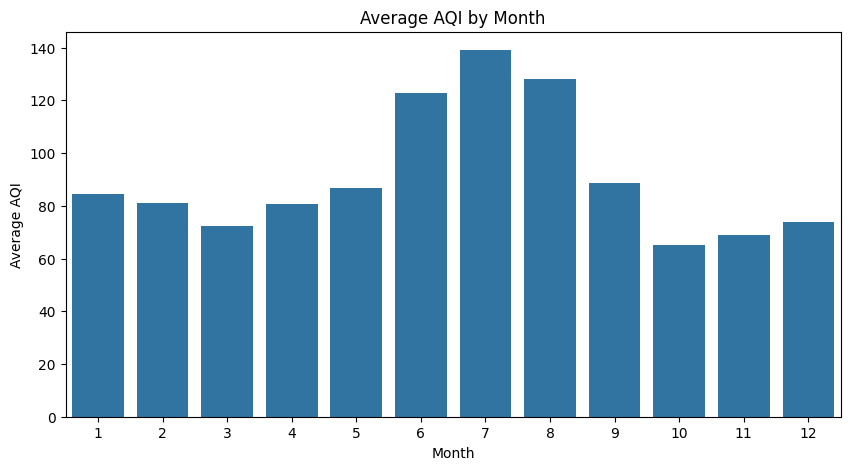

In [54]:
monthly_aqi = air_wide.groupby('month')['AQI'].mean()
plt.figure(figsize=(10,5))
sns.barplot(x=monthly_aqi.index, y=monthly_aqi.values)
plt.title('Average AQI by Month')
plt.xlabel('Month')
plt.ylabel('Average AQI')
plt.show()

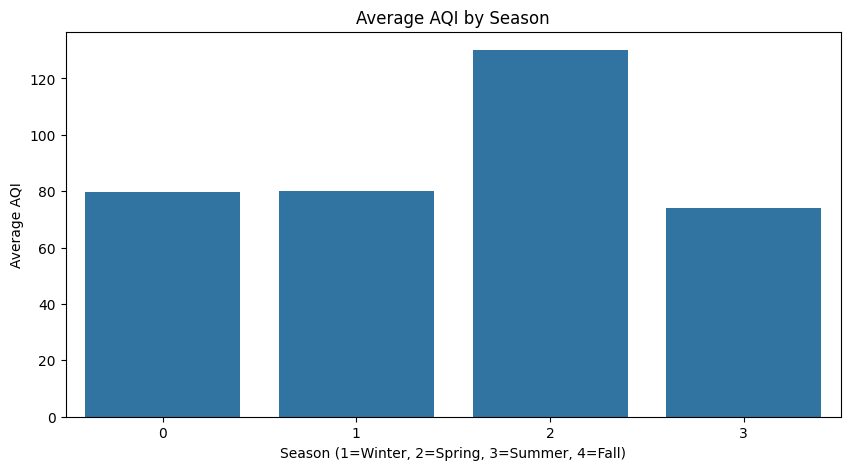

In [55]:
seasonal_aqi = air_wide.groupby('season')['AQI'].mean()
plt.figure(figsize=(10,5))
sns.barplot(x=seasonal_aqi.index, y=seasonal_aqi.values)
plt.title('Average AQI by Season')
plt.xlabel('Season (1=Winter, 2=Spring, 3=Summer, 4=Fall)')
plt.ylabel('Average AQI')
plt.show()


Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.



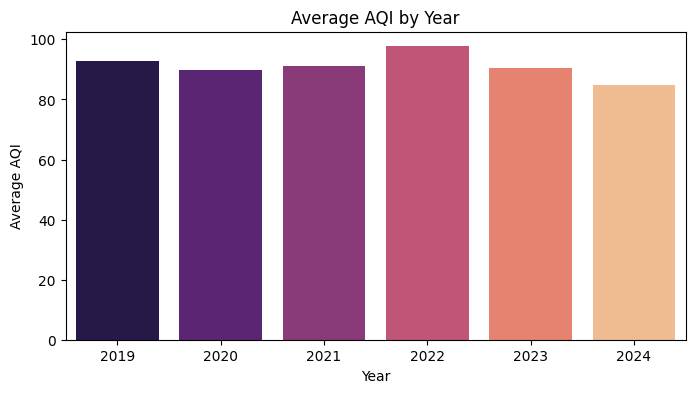

In [56]:
yearly_avg = air_wide.groupby('year')['AQI'].mean().reset_index()

plt.figure(figsize=(8,4))
sns.barplot(x='year', y='AQI', data=yearly_avg, palette='magma')
plt.title('Average AQI by Year')
plt.xlabel('Year')
plt.ylabel('Average AQI')
plt.show()

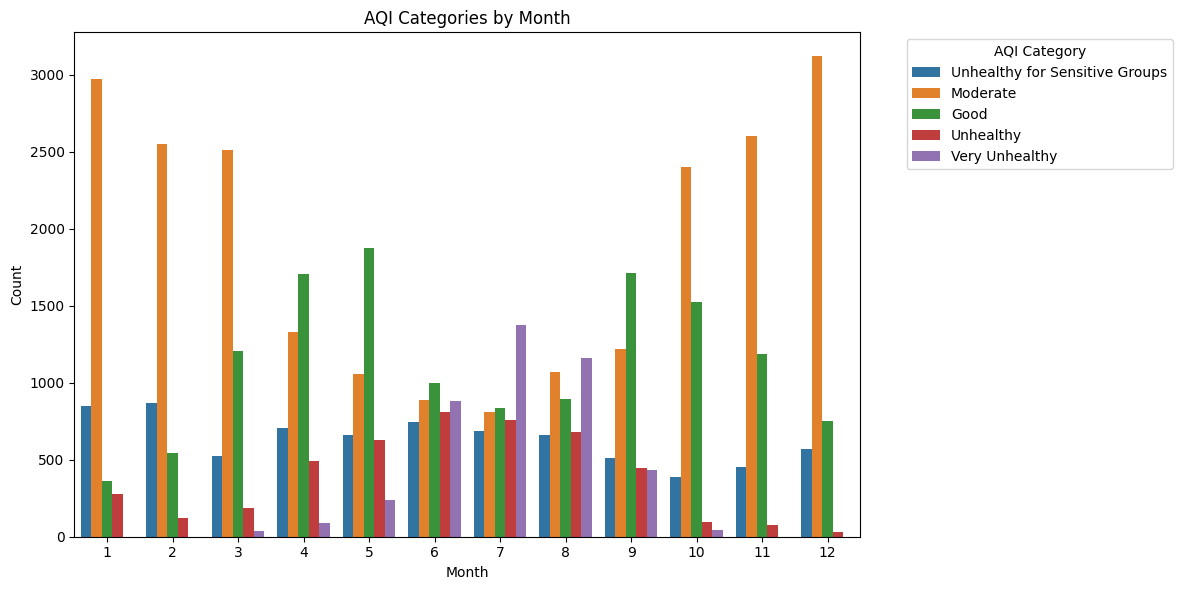

In [57]:
plt.figure(figsize=(12,6))
sns.countplot(x='month', hue='AQI_category', data=air_wide,
              order=range(1,13))
plt.title('AQI Categories by Month')
plt.xlabel('Month')
plt.ylabel('Count')
plt.legend(title='AQI Category', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

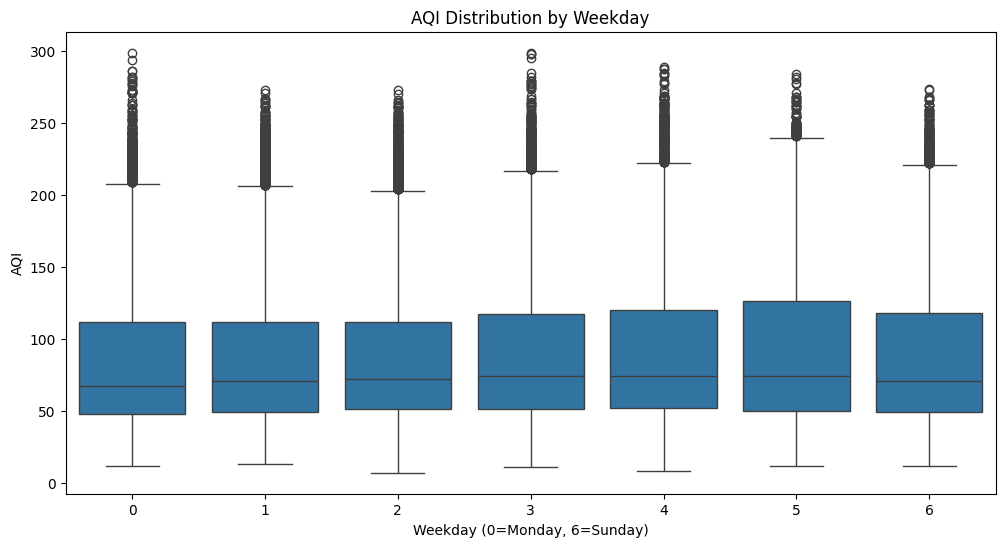

In [58]:
plt.figure(figsize=(12,6))
sns.boxplot(x='weekday', y='AQI', data=air_wide)
plt.title('AQI Distribution by Weekday')
plt.xlabel('Weekday (0=Monday, 6=Sunday)')
plt.ylabel('AQI')
plt.show()

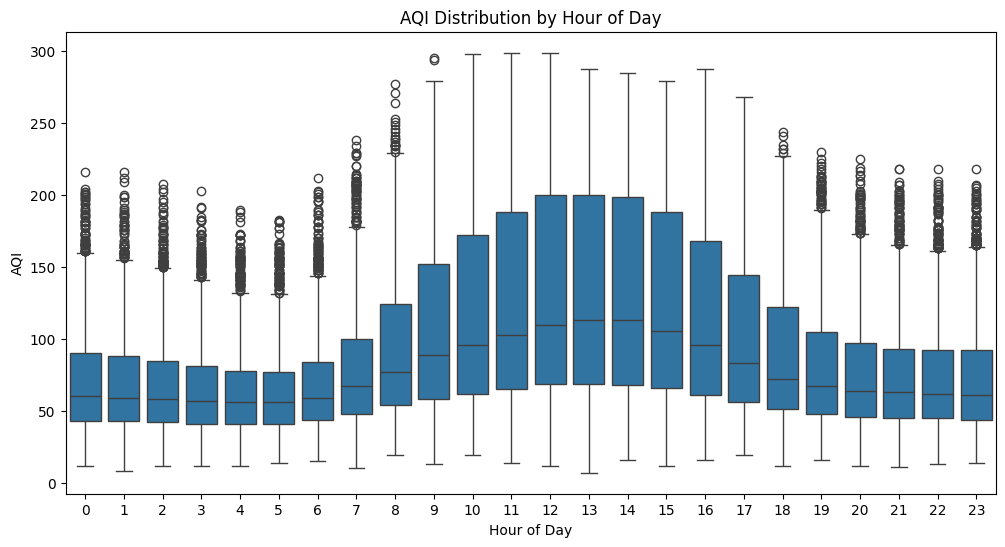

In [60]:
air_wide['hour'] = air_wide.index.hour
plt.figure(figsize=(12,6))
sns.boxplot(x='hour', y='AQI', data=air_wide)
plt.title('AQI Distribution by Hour of Day')
plt.xlabel('Hour of Day')
plt.ylabel('AQI')
plt.show()

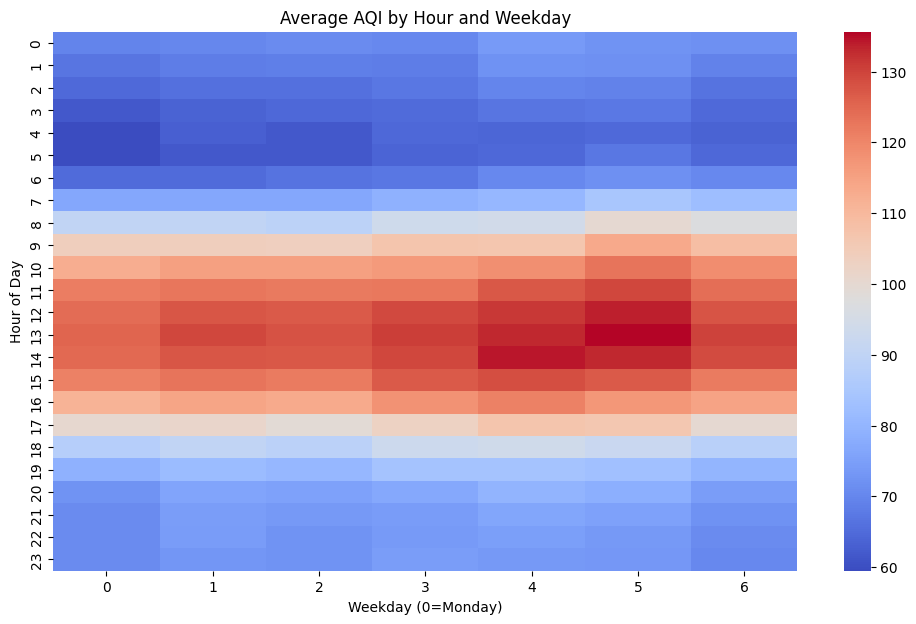

In [61]:
pivot_table = air_wide.pivot_table(values='AQI', index='hour', columns='weekday', aggfunc='mean')
plt.figure(figsize=(12,7))
sns.heatmap(pivot_table, cmap='coolwarm')
plt.title('Average AQI by Hour and Weekday')
plt.xlabel('Weekday (0=Monday)')
plt.ylabel('Hour of Day')
plt.show()

In [62]:
pollutants = ['BENZENE', 'NO', 'NO2', 'NOX', 'O3', 'PM10', 'PM2.5', 'CO_ugm3']

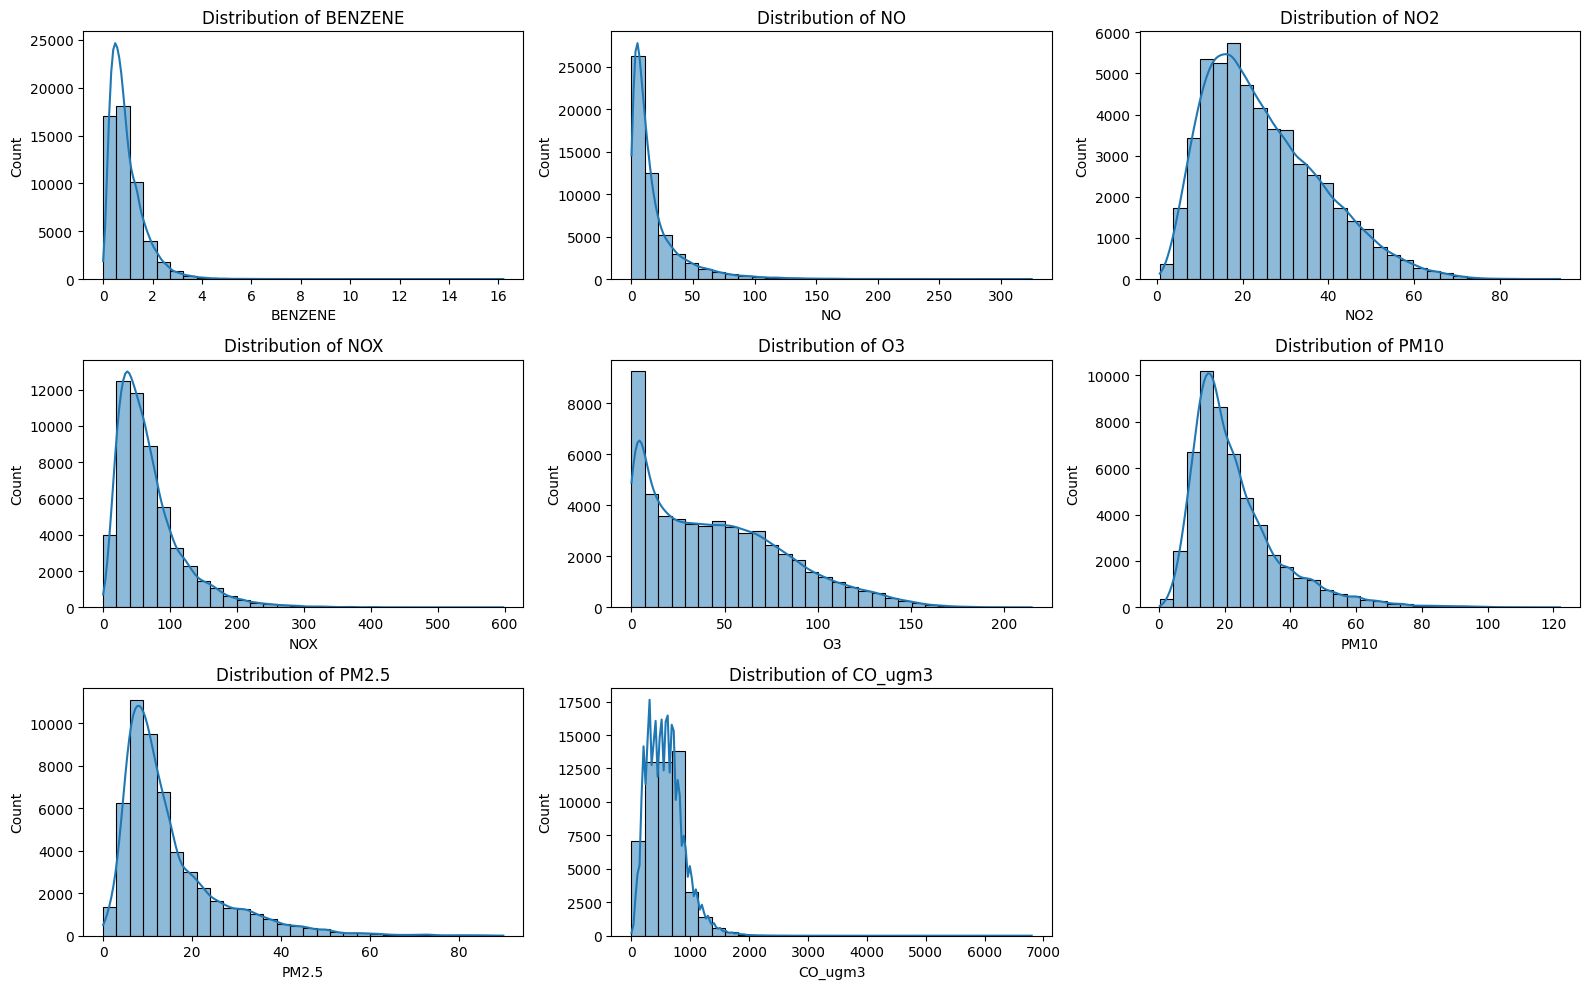

In [63]:
plt.figure(figsize=(16, 10))
for i, pollutant in enumerate(pollutants, 1):
    plt.subplot(3, 3, i)
    sns.histplot(air_wide[pollutant], kde=True, bins=30)
    plt.title(f'Distribution of {pollutant}')
plt.tight_layout()
plt.show()

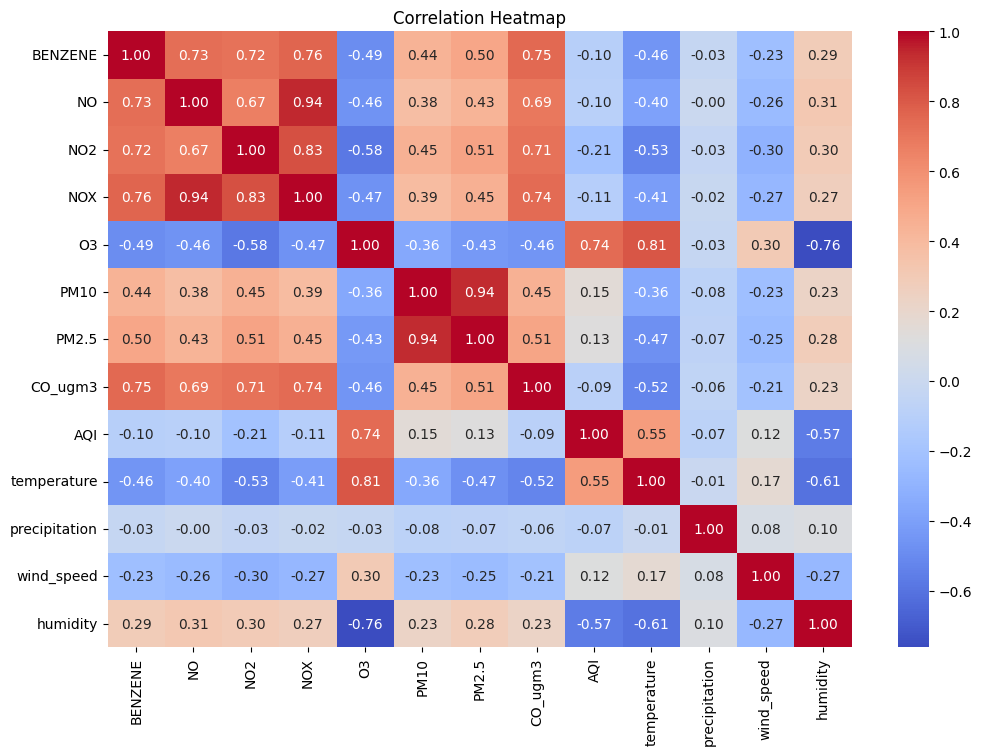

In [64]:
plt.figure(figsize=(12, 8))
corr_matrix = air_wide[pollutants + ['AQI', 'temperature', 'precipitation', 'wind_speed', 'humidity']].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

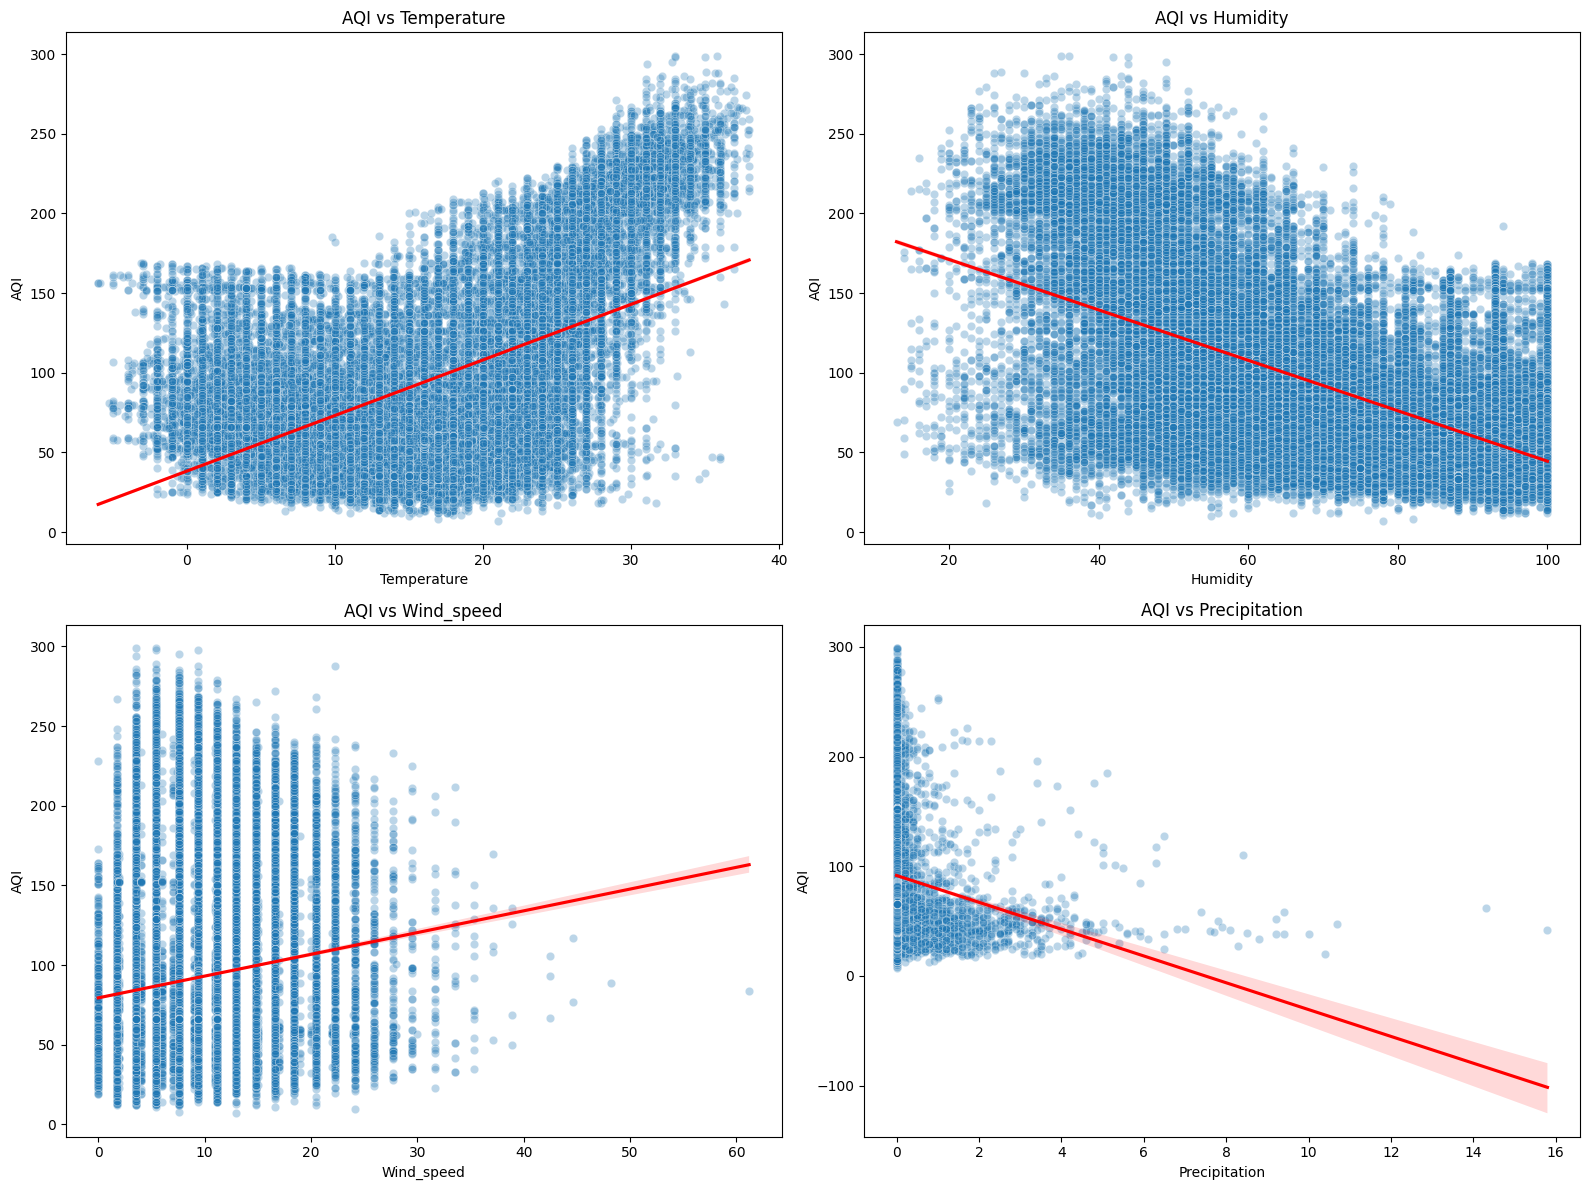

In [65]:
weather_vars = ['temperature', 'humidity', 'wind_speed', 'precipitation']
pollutant = 'AQI'

plt.figure(figsize=(16, 12))

for i, var in enumerate(weather_vars, 1):
    plt.subplot(2, 2, i)
    sns.scatterplot(data=air_wide, x=var, y=pollutant, alpha=0.3)
    sns.regplot(data=air_wide, x=var, y=pollutant, scatter=False, color='red')
    plt.title(f'{pollutant} vs {var.capitalize()}')
    plt.xlabel(var.capitalize())
    plt.ylabel(pollutant)

plt.tight_layout()
plt.show()

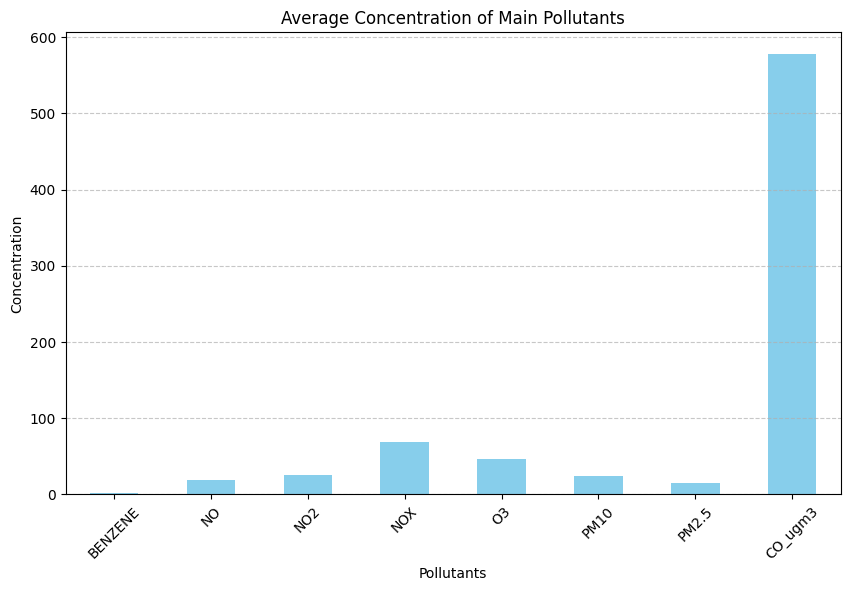

In [66]:
main_pollutants = ['BENZENE', 'NO', 'NO2', 'NOX', 'O3', 'PM10', 'PM2.5', 'CO_ugm3']

# Filter only pollutants present in your data
pollutants_main = [p for p in main_pollutants if p in air_wide.columns]

# Calculate the mean concentration for each pollutant over the whole period
mean_concentration = air_wide[pollutants_main].mean()

# Plot bar chart
plt.figure(figsize=(10,6))
mean_concentration.plot(kind='bar', color='skyblue')
plt.title('Average Concentration of Main Pollutants')
plt.ylabel('Concentration')
plt.xlabel('Pollutants')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(rotation=45)
plt.show()

In [67]:
df = air_wide.copy()

In [68]:
df

,BENZENE,NO,NO2,NOX,O3,PM10,PM2.5,year,month,day,...,season,is_holiday,temperature,precipitation,wind_speed,humidity,CO_ugm3,AQI,AQI_category,hour
start_datetime,,,,,,,,,,,,,,,,,,,,,
2019-01-01 00:00:00+00:00,4.6,95.0,27.000000,182.0,3.5,50.152778,37.916667,2019,1,1,...,0,0,-1.0,0.0,3.6,98.0,1700.0,107,Unhealthy for Sensitive Groups,0
2019-01-01 01:00:00+00:00,4.6,95.0,24.666667,180.0,2.0,48.972222,36.833333,2019,1,1,...,0,0,-1.0,0.0,1.8,100.0,1700.0,104,Unhealthy for Sensitive Groups,1
2019-01-01 02:00:00+00:00,4.7,98.0,22.500000,187.0,1.5,47.791667,35.750000,2019,1,1,...,0,0,-2.0,0.0,3.6,100.0,1800.0,102,Unhealthy for Sensitive Groups,2
2019-01-01 03:00:00+00:00,4.6,101.0,32.500000,194.0,2.0,46.611111,34.666667,2019,1,1,...,0,0,-2.2,0.0,0.0,97.0,1800.0,98,Moderate,3
2019-01-01 04:00:00+00:00,4.5,101.0,29.000000,194.0,1.0,45.430556,33.583333,2019,1,1,...,0,0,-3.0,0.0,1.8,100.0,1700.0,96,Moderate,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-12-31 18:00:00+00:00,2.3,64.0,33.333333,134.0,10.0,22.333333,19.000000,2024,12,31,...,0,0,5.1,0.0,3.6,81.0,1000.0,66,Moderate,18
2024-12-31 19:00:00+00:00,2.1,51.0,31.333333,112.0,8.0,22.333333,19.000000,2024,12,31,...,0,0,4.0,0.0,9.4,87.0,800.0,66,Moderate,19
2024-12-31 20:00:00+00:00,1.7,32.0,26.000000,77.0,20.0,22.333333,19.000000,2024,12,31,...,0,0,5.0,0.0,9.4,81.0,700.0,66,Moderate,20


In [69]:
df.columns

Index(['BENZENE', 'NO', 'NO2', 'NOX', 'O3', 'PM10', 'PM2.5', 'year', 'month',
       'day', 'weekday', 'is_weekend', 'season', 'is_holiday', 'temperature',
       'precipitation', 'wind_speed', 'humidity', 'CO_ugm3', 'AQI',
       'AQI_category', 'hour'],
      dtype='object')

In [70]:
df.dtypes

BENZENE          float64
NO               float64
NO2              float64
NOX              float64
O3               float64
PM10             float64
PM2.5            float64
year               int32
month              int32
day                int32
weekday            int32
is_weekend         int64
season             int64
is_holiday         int64
temperature      Float64
precipitation    Float64
wind_speed       Float64
humidity         Float64
CO_ugm3          float64
AQI                int64
AQI_category      object
hour               int32
dtype: object

In [71]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.preprocessing import LabelEncoder

In [72]:
le = LabelEncoder()
df['AQI_category_encoded'] = le.fit_transform(df['AQI_category'])

In [73]:
df.isnull().sum()

BENZENE                 0
NO                      0
NO2                     0
NOX                     0
O3                      0
PM10                    0
PM2.5                   0
year                    0
month                   0
day                     0
weekday                 0
is_weekend              0
season                  0
is_holiday              0
temperature             0
precipitation           0
wind_speed              0
humidity                0
CO_ugm3                 0
AQI                     0
AQI_category            0
hour                    0
AQI_category_encoded    0
dtype: int64

In [74]:
def get_part_of_day(hour):
    if 5 <= hour < 12:
        return 'morning'
    elif 12 <= hour < 17:
        return 'afternoon'
    elif 17 <= hour < 21:
        return 'evening'
    else:
        return 'night'

df['part_of_day'] = df['hour'].apply(get_part_of_day)

In [76]:
df['part_of_day'] = df['part_of_day'].astype('category').cat.codes

In [ ]:
# hour (0-23)
df['hour_sin'] = np.sin(2 * np.pi * df['hour'] / 24)
df['hour_cos'] = np.cos(2 * np.pi * df['hour'] / 24)

# weekday (0-6)
df['weekday_sin'] = np.sin(2 * np.pi * df['weekday'] / 7)
df['weekday_cos'] = np.cos(2 * np.pi * df['weekday'] / 7)

# month (1-12)
df['month_sin'] = np.sin(2 * np.pi * df['month'] / 12)
df['month_cos'] = np.cos(2 * np.pi * df['month'] / 12)


In [79]:
df = df.drop(['hour', 'weekday', 'month', 'day'], axis=1)

In [80]:
df.columns

Index(['BENZENE', 'NO', 'NO2', 'NOX', 'O3', 'PM10', 'PM2.5', 'year',
       'is_weekend', 'season', 'is_holiday', 'temperature', 'precipitation',
       'wind_speed', 'humidity', 'CO_ugm3', 'AQI', 'AQI_category',
       'AQI_category_encoded', 'part_of_day', 'hour_sin', 'hour_cos',
       'weekday_sin', 'weekday_cos', 'month_sin', 'month_cos', 'day_sin',
       'day_cos'],
      dtype='object')

In [81]:
df.drop(['day_sin', 'day_cos'], axis=1, inplace=True)

In [89]:
# Add day of year from the DatetimeIndex
df['day_of_year'] = df.index.dayofyear

# Add sin and cos transformations
df['dayofyear_sin'] = np.sin(2 * np.pi * df['day_of_year'] / 365)
df['dayofyear_cos'] = np.cos(2 * np.pi * df['day_of_year'] / 365)

In [91]:
lag_features = [
    'PM10', 'PM2.5', 'NO', 'NO2', 'NOX', 'O3', 
    'temperature', 'humidity', 'CO_ugm3', 'AQI'
]

In [92]:
for feature in lag_features:
    for lag in [1, 2, 3]:
        df[f'{feature}_lag{lag}'] = df[feature].shift(lag)

In [94]:
df.dropna(inplace=True)

In [95]:
df.isnull().sum()

BENZENE                 0
NO                      0
NO2                     0
NOX                     0
O3                      0
PM10                    0
PM2.5                   0
year                    0
is_weekend              0
season                  0
is_holiday              0
temperature             0
precipitation           0
wind_speed              0
humidity                0
CO_ugm3                 0
AQI                     0
AQI_category            0
AQI_category_encoded    0
part_of_day             0
hour_sin                0
hour_cos                0
weekday_sin             0
weekday_cos             0
month_sin               0
month_cos               0
day_of_year             0
dayofyear_sin           0
dayofyear_cos           0
PM10_lag1               0
PM10_lag2               0
PM10_lag3               0
PM2.5_lag1              0
PM2.5_lag2              0
PM2.5_lag3              0
NO_lag1                 0
NO_lag2                 0
NO_lag3                 0
NO2_lag1    

In [96]:
df.columns

Index(['BENZENE', 'NO', 'NO2', 'NOX', 'O3', 'PM10', 'PM2.5', 'year',
       'is_weekend', 'season', 'is_holiday', 'temperature', 'precipitation',
       'wind_speed', 'humidity', 'CO_ugm3', 'AQI', 'AQI_category',
       'AQI_category_encoded', 'part_of_day', 'hour_sin', 'hour_cos',
       'weekday_sin', 'weekday_cos', 'month_sin', 'month_cos', 'day_of_year',
       'dayofyear_sin', 'dayofyear_cos', 'PM10_lag1', 'PM10_lag2', 'PM10_lag3',
       'PM2.5_lag1', 'PM2.5_lag2', 'PM2.5_lag3', 'NO_lag1', 'NO_lag2',
       'NO_lag3', 'NO2_lag1', 'NO2_lag2', 'NO2_lag3', 'NOX_lag1', 'NOX_lag2',
       'NOX_lag3', 'O3_lag1', 'O3_lag2', 'O3_lag3', 'temperature_lag1',
       'temperature_lag2', 'temperature_lag3', 'humidity_lag1',
       'humidity_lag2', 'humidity_lag3', 'CO_ugm3_lag1', 'CO_ugm3_lag2',
       'CO_ugm3_lag3', 'AQI_lag1', 'AQI_lag2', 'AQI_lag3'],
      dtype='object')

In [97]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

In [98]:
features_base = [
    'BENZENE', 'NO', 'NO2', 'NOX', 'O3', 'PM10', 'PM2.5', 'year',
    'is_weekend', 'season', 'is_holiday', 'temperature', 'precipitation',
    'wind_speed', 'humidity', 'CO_ugm3', 'part_of_day',
    'hour_sin', 'hour_cos', 'weekday_sin', 'weekday_cos',
    'month_sin', 'month_cos', 'day_of_year', 'dayofyear_sin', 'dayofyear_cos',
]


In [99]:
lag_features = [col for col in df.columns if any(col.endswith(f'_lag{i}') for i in [1, 2, 3])]

In [100]:
features = features_base + lag_features

In [101]:
X = df[features]
y = df['AQI_category_encoded']

In [102]:
X = X.dropna()
y = y.loc[X.index]

In [103]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)


In [104]:
clf = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)
clf.fit(X_train, y_train)

# 6. Predict and evaluate
y_pred = clf.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 0.9886882129277567
              precision    recall  f1-score   support

           0       1.00      0.97      0.98      2720
           1       0.99      1.00      0.99      4507
           2       0.96      0.99      0.97       919
           3       0.98      0.99      0.99      1523
           4       1.00      1.00      1.00       851

    accuracy                           0.99     10520
   macro avg       0.99      0.99      0.99     10520
weighted avg       0.99      0.99      0.99     10520



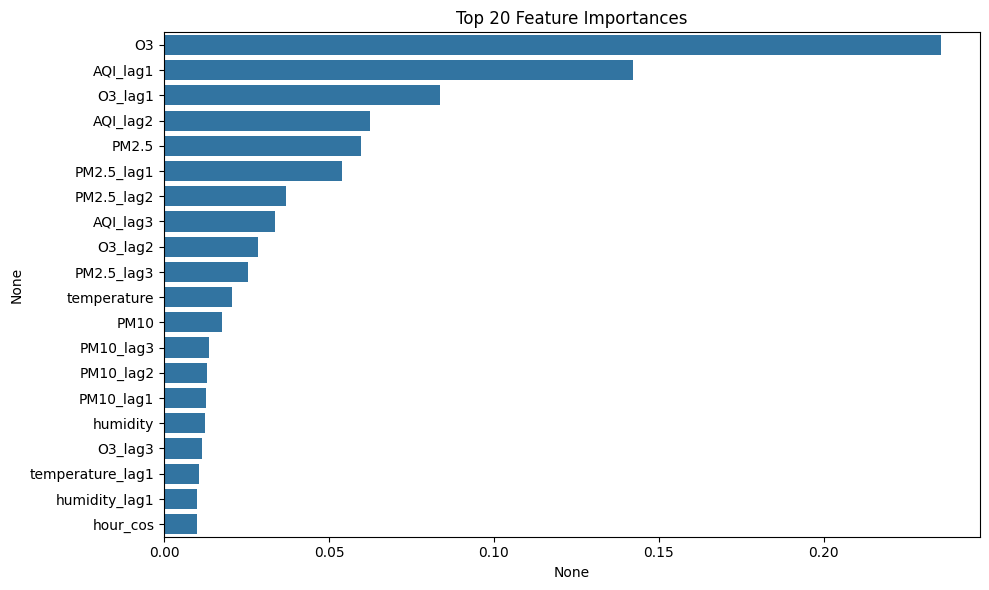

In [106]:
feat_importances = pd.Series(clf.feature_importances_, index=X.columns)
top_feats = feat_importances.sort_values(ascending=False).head(20)

plt.figure(figsize=(10, 6))
sns.barplot(x=top_feats, y=top_feats.index)
plt.title("Top 20 Feature Importances")
plt.tight_layout()
plt.show()

In [107]:
feat_importances = pd.Series(clf.feature_importances_, index=X.columns)
top_feats = feat_importances.sort_values(ascending=False).head(20)

# Convert to DataFrame for a nice table
top_feats_df = top_feats.reset_index()
top_feats_df.columns = ['Feature', 'Importance']

print(top_feats_df)

             Feature  Importance
0                 O3    0.235578
1           AQI_lag1    0.142232
2            O3_lag1    0.083571
3           AQI_lag2    0.062551
4              PM2.5    0.059739
5         PM2.5_lag1    0.053840
6         PM2.5_lag2    0.036910
7           AQI_lag3    0.033520
8            O3_lag2    0.028369
9         PM2.5_lag3    0.025359
10       temperature    0.020651
11              PM10    0.017436
12         PM10_lag3    0.013758
13         PM10_lag2    0.012935
14         PM10_lag1    0.012777
15          humidity    0.012562
16           O3_lag3    0.011383
17  temperature_lag1    0.010564
18     humidity_lag1    0.010095
19          hour_cos    0.010010
